In [21]:
'''
Importing a lot of stuff so this circuit can work.
'''
from qiskit import QuantumRegister,ClassicalRegister
from qiskit import QuantumCircuit,execute, Aer
import matplotlib
from qiskit.visualization import plot_histogram
import numpy as np
from operator import add 
import matplotlib.pyplot as plt

In [22]:
'''
Creating Majority gate for quantum full adder:
'''

q = QuantumRegister(3)
maj_circuit = QuantumCircuit(q, name='maj')

maj_circuit.cx( q[2], q[1] )
maj_circuit.cx( q[2], q[0] )
maj_circuit.ccx( q[0], q[1], q[2])

#maj_circuit.draw(output='mpl')

# composite gate
maj_gate = maj_circuit.to_instruction()

In [23]:
'''
Creating Un-Majority gate for quantum full adder:
'''

Q = QuantumRegister(3)
unmaj_circuit = QuantumCircuit(Q, name='unmaj')

unmaj_circuit.ccx( Q[0], Q[1], Q[2] )
unmaj_circuit.cx( Q[2], Q[0] )
unmaj_circuit.cx( Q[0], Q[1] )

#unmaj_circuit.draw(output='mpl')

# composite gate
unmaj_gate = unmaj_circuit.to_instruction()

In [41]:
'''
4-bit Quantum Ripple Adder function:
'''

def Four_Bit_Ripple_Adder( Input_1, Input_2, Carry_In ):
    q = QuantumRegister( 18, 'q' )
    c = ClassicalRegister(9, 'c' )
    qc = QuantumCircuit( q, c )
    
    # Setting up the ancilla Cin input:
    if( Carry_In == 1 ):
        qc.x(q[0])
        
    # Setting up first binary number inputs:
    if( Input_1 & 0x01 ):
        qc.x(q[2])
    if( Input_1 & 0x02 ):
        qc.x(q[4])
    if( Input_1 & 0x04):
        qc.x(q[6])
    if( Input_1 & 0x08 ):
        qc.x(q[8])
    if( Input_1 & 0x10 ):
        qc.x(q[10])
    if( Input_1 & 0x20):
        qc.x(q[12])
    if( Input_1 & 0x40):
        qc.x(q[14])
    if( Input_1 & 0x80):
        qc.x(q[16])
    
    # Setting up second binary number inputs:
    if( Input_2 & 0x01 ):
        qc.x(q[1])
    if( Input_2 & 0x02 ):
        qc.x(q[3])
    if( Input_2 & 0x04 ):
        qc.x(q[5])
    if( Input_2 & 0x08 ):
        qc.x(q[7])
    if( Input_2 & 0x10 ):
        qc.x(q[9])
    if( Input_2 & 0x20):
        qc.x(q[11])
    if( Input_2 & 0x40):
        qc.x(q[13])
    if( Input_2 & 0x80):
        qc.x(q[15])
        
    # Constructing 8-bit Quantum Ripple Adder Circuit:
    qc.append( maj_gate, [q[0], q[1], q[2]] )
    qc.append( maj_gate, [q[2], q[3], q[4]] )
    qc.append( maj_gate, [q[4], q[5], q[6]] )
    qc.append( maj_gate, [q[6], q[7], q[8]] )
    qc.append( maj_gate, [q[8], q[9], q[10]] )
    qc.append( maj_gate, [q[10], q[11], q[12]] )
    qc.append( maj_gate, [q[12], q[13], q[14]] )
    qc.append( maj_gate, [q[14], q[15], q[16]] )


    qc.cx( q[16], q[17] )
    
    qc.append( unmaj_gate, [q[14], q[15], q[16]] )
    qc.append( unmaj_gate, [q[12], q[13], q[14]] )
    qc.append( unmaj_gate, [q[10], q[11], q[12]] )
    qc.append( unmaj_gate, [q[8], q[9], q[10]] )
    qc.append( unmaj_gate, [q[6], q[7], q[8]] )
    qc.append( unmaj_gate, [q[4], q[5], q[6]] )
    qc.append( unmaj_gate, [q[2], q[3], q[4]] )
    qc.append( unmaj_gate, [q[0], q[1], q[2]] )

    qc.barrier()
    
    # Measuring COUT, s0, s1, s2, s3, s4, s5, s6, s7
    qc.measure(q[17], c[8])
    qc.measure(q[15], c[7])
    qc.measure(q[13], c[6])
    qc.measure(q[11], c[5])
    qc.measure(q[9], c[4])
    qc.measure(q[7], c[3])
    qc.measure(q[5], c[2])
    qc.measure(q[3], c[1])
    qc.measure(q[1], c[0])
    
    return qc

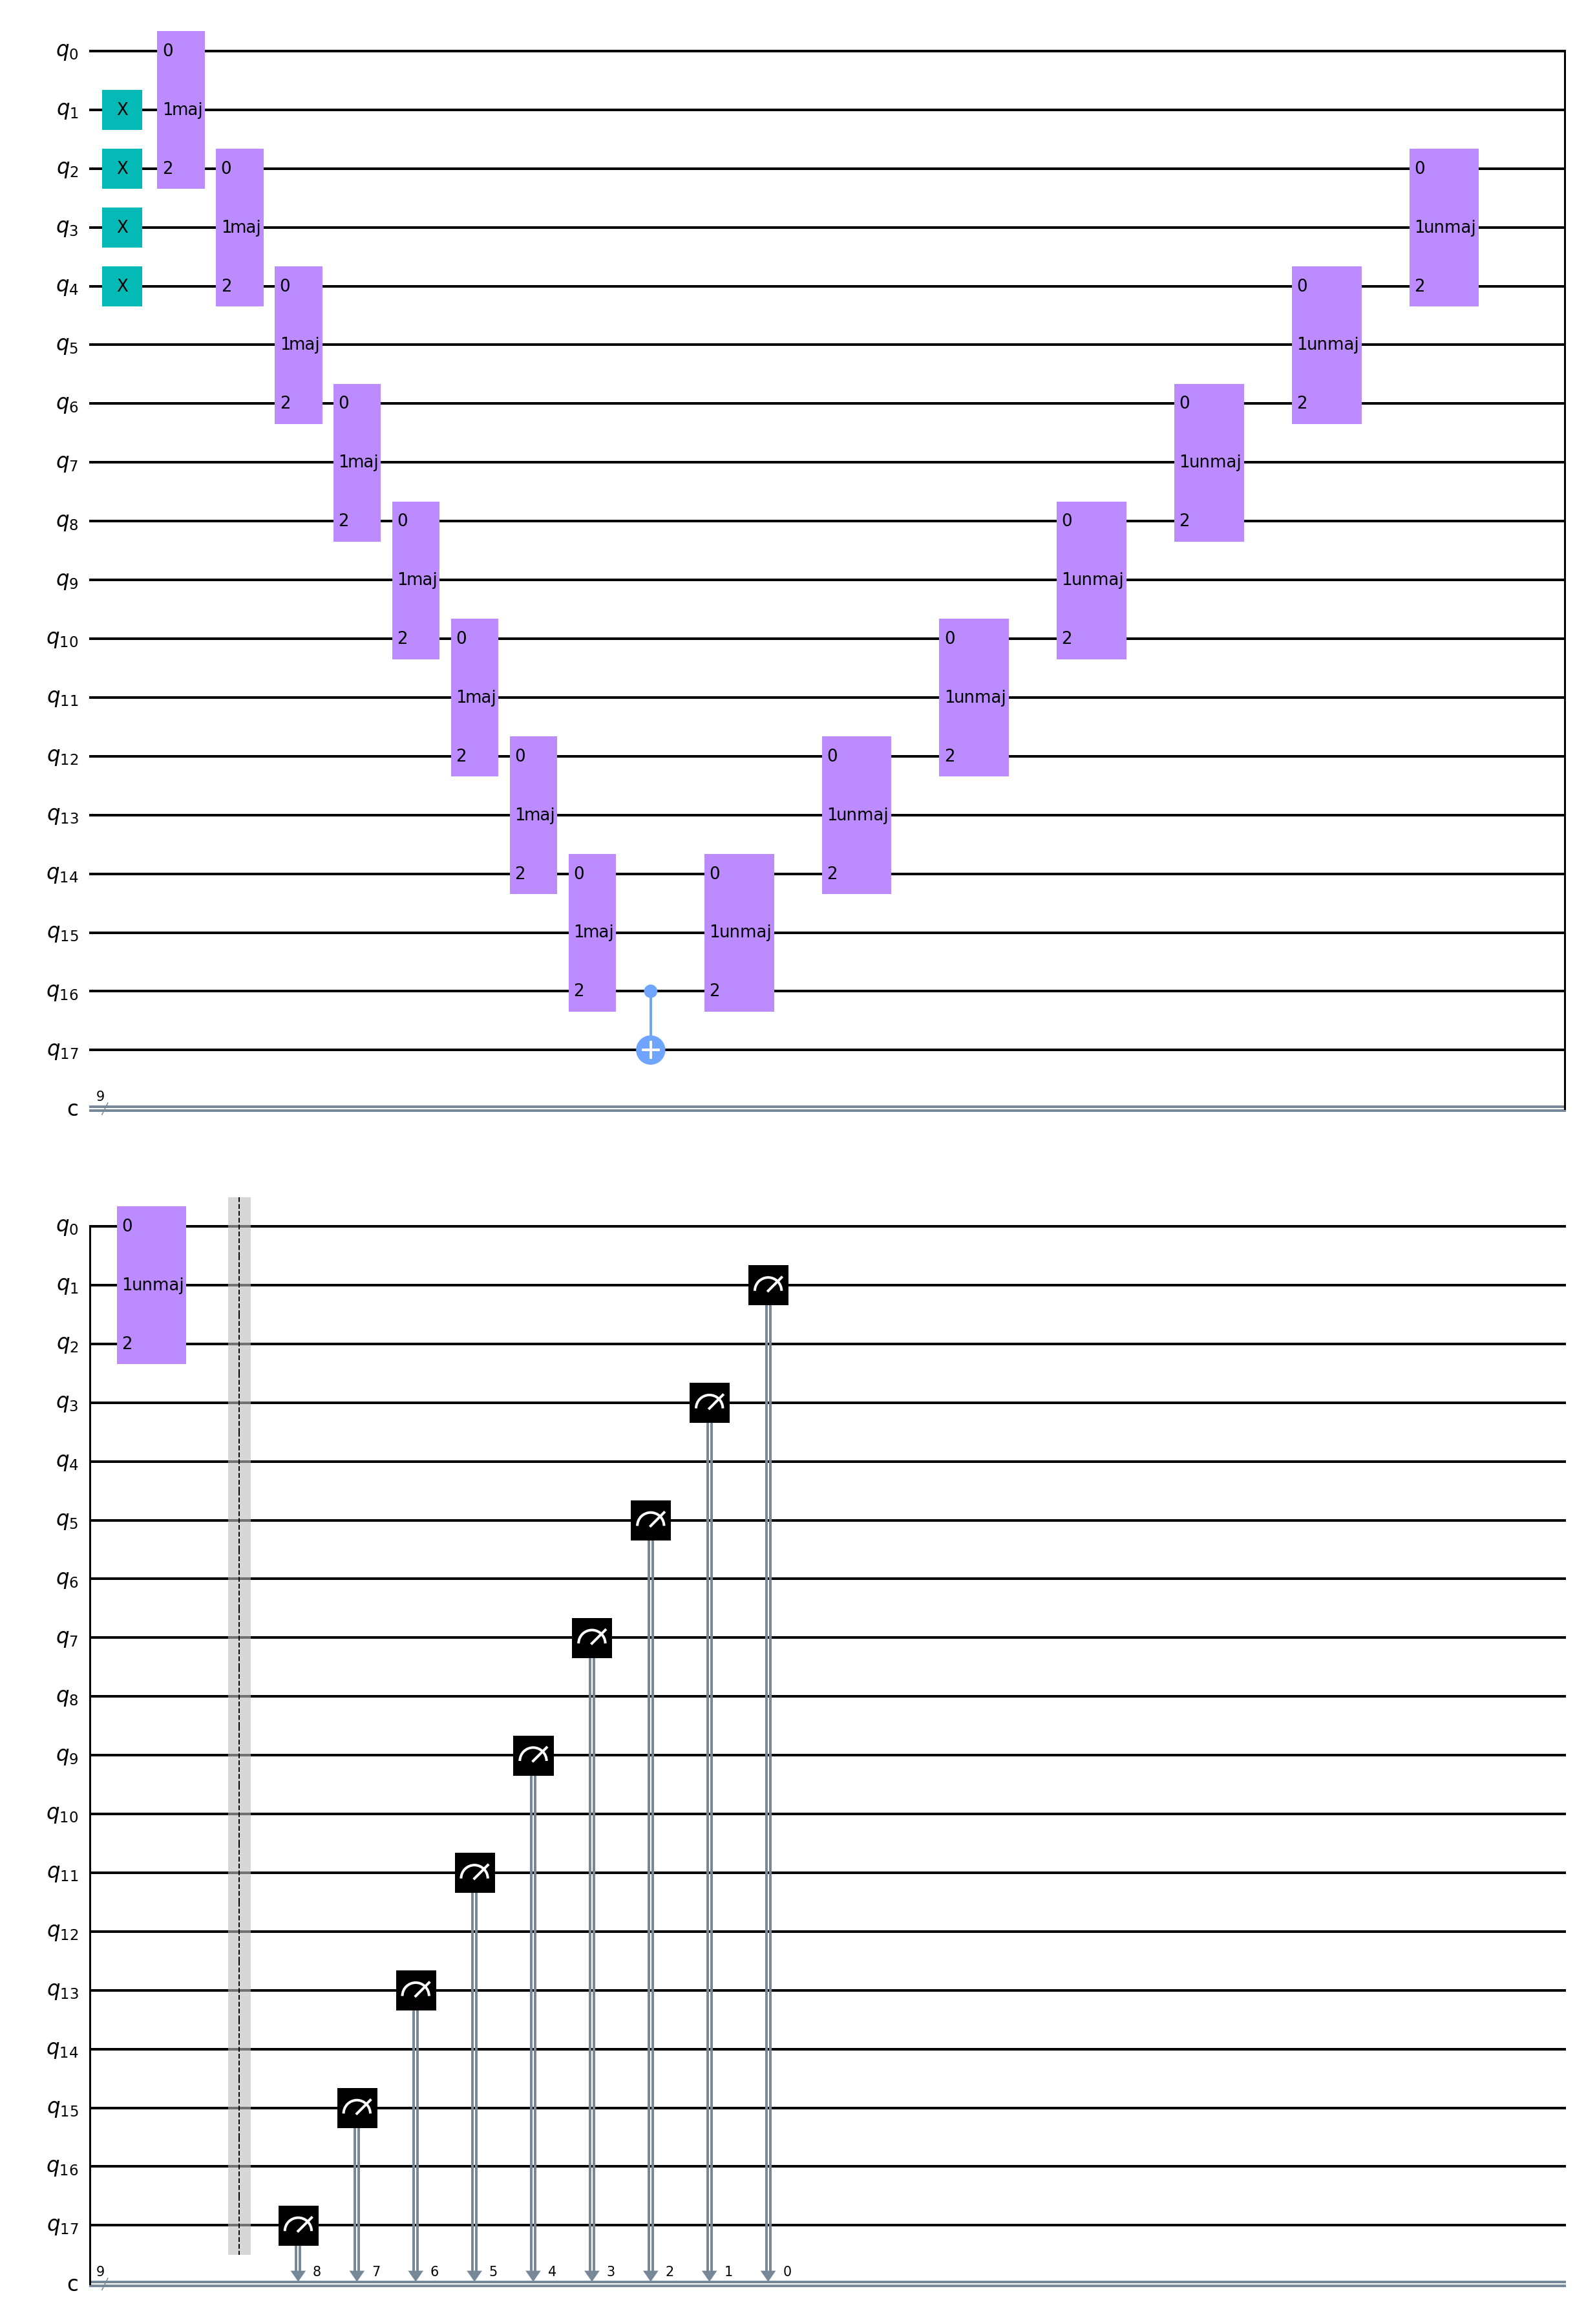

In [64]:
'''
To show multiple examples of the quantum circuit, I have Input_1 and Input_2 as a list, then I perform the function and 
execute the job using a for loop to get 'counts' for each pair of numbers I wish to add. The counts get stacked up in the
histogram plot.
'''

Input_1 = 3
Input_2 = 3
Carry_In = 0

QC = Four_Bit_Ripple_Adder( Input_1, Input_2, Carry_In )
    
QC.draw( output='mpl', scale = 2.0 )

{'000000110': 1024}


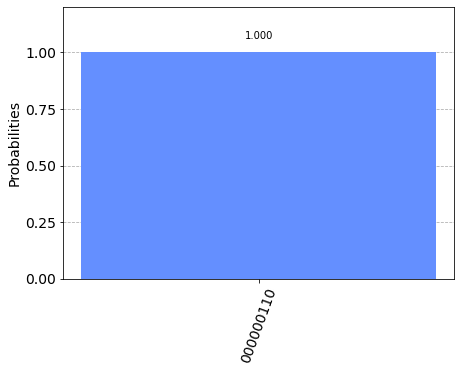

In [65]:
#Create a simulator to perform noisy simulation using the qasm_simulator 
sim = Aer.get_backend('qasm_simulator')
#Perform the noisy simulation using the qasm_Simulator and repeat 1024 times
job = execute(QC,backend=sim,shots=1024)
#Obtain the results of the job submitted
result = job.result()
#Obtain the results of the simulation
counts= result.get_counts(QC)
print(counts)

plot_histogram(counts)
